<a href="https://colab.research.google.com/github/EzeRivero/Data-Science-II/blob/main/IA_Job_Rivero_Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Science II: Entrega Final
##Ezequiel Rivero
###Comisión 90455



#Introducción
En este trabajo estaré utilizando un dataset obtenido desde Kaggle.com, el cual trata de información sobre puestos de trabajo y salarios relacionados con Inteligencia Artificial, y tendencias en cuanto al mercado laboral global.

Elegí este dataset ya que es un tema en auge en la actualidad, y me pareció interesante analizarlo, además de que esta base de datos cumple con todos los requisitos de la entrega (tamaño, cantidad de variables, etc.). Es una temática que se encuentra en crecimiento y un mercado laboral de alta demanda, por lo que este análisis puede ser valioso. Cabe mencionar que los datos fueron generados artificialmente mediante herramientas de IA, por lo que no se tomaron fuentes de datos reales, aunque no impide su uso educacional y práctico.



#Objetivo

El **objetivo** será ***analizar los factores que influyen sobre el salario anual***, tanto demográficos como laborales, y poder desarrollar un modelo predictivo de regresión para poder estimar el mismo. Es por ello que para orientarnos en la elaboración de las hipótesis, buscaremos responder las siguientes preguntas:
+ ¿Cómo varía el salario anual según el nivel de experiencia (Entry, Mid, Senior, Executive)?
+ ¿Hay diferencias significativas entre las distintos grados de presencialidad (Remoto, Híbrido, Presencial)?
+ ¿Hay países que tengan, en promedio, mejores salarios que otros?
+ ¿Cómo se relacionan las variables como experiencia, presencialidad y país simultaneamente, con el salario anual?
+ ¿Hay alguna/s otra/s variable/s que modifique/n el salario anual de manera relevante?

#Contexto comercial
Para este trabajo, abordaremos el rol de una empresa consultora, dedicada al análisis estratégico, gestión y desarrollo de personas, y estudios de mercado y de opinión pública, para encontrar insights del mercado laboral relacionado a IA, y poder especializarse en este creciente sector.

#Hipótesis
Hipótesis Nula (H0): No existe una relación estadísticamente significativa entre alguna de las características laborales y el salario anual.

Hipótesis Alternativa (HA): Es posible predecir el salario anual, a partir de las características laborales, como el nivel de experiencia, entre otras.


Para comenzar con el análisis de los datos, importamos las librerías que utilizaremos, cargamos el dataset y observamos sus características generales:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/EzeRivero/Data-Science-II/refs/heads/main/ai_job_dataset.csv'

df = pd.read_csv(url)

#Glosario
+ job_id:	Id único para cada oferta de empleo.
+ job_title:	título del puesto estandarizado.
+ salary_usd:	Salario anual en dólares estadounidenses.
+ salary_currency:	Moneda original del salario.
+ experience_level:	Nivel de experiencia o señority: EN (Entry, Principiante), MI (Mid, Intermedio), SE (Senior), EX (Executive, Ejecutivo).
+ employment_type: Tipo de empleo:	FT (Full-time o tiempo completo), PT (Part-time o medio tiempo), CT (Contract o contrato), FL (Freelance o autónomo).
+ company_location:	País donde se ubica la empresa.
+ company_size:	Tamaño de la empresa según empleados: S (Pequeña <50), M (Mediana 50-250), L (Grande >250).
+ employee_residence:	País donde vive el empleado.
+ remote_ratio:	Proporción de (no) presencialidad del puesto: 0 (No remoto o presencial), 50 (Híbrido), 100 (completamente remoto).
+ required_skills:	Las 5 habilidades más requeridas(separadas por comas).
+ education_required:	El nivel mínimo de educación requerido.
+ years_experience:	Años de experiencia requeridos.
+ industry:	Sector industrial de la empresa.
+ posting_date:	Fecha en donde se publicó el puesto
+ application_deadline:	Fecha límite de solicitud.
+ job_description_length:	Recuento de caracteres de la descripción de puesto.
+ benefits_score:	Puntuación numérica del paquete de beneficios (1-10).
+ company_name: Nombre de la empresa.

In [ ]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


#Análisis exploratorio de datos (EDA) y Data Wrangling

In [ ]:
df.shape

(15000, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [ ]:
#Formateamos a formato datetime las columnas con fechas (para ver el cambio, ejecutamos nuevamente df.info)

df['application_deadline'] = pd.to_datetime(df['application_deadline'])
df['posting_date'] = pd.to_datetime(df['posting_date'])

In [ ]:
df.dtypes['application_deadline']
df.dtypes['posting_date']

dtype('<M8[ns]')

In [ ]:
#Nos aseguramos que no hay presencia de valores nulos ni duplicados
print(df.isnull().sum())
df.duplicated().value_counts()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64


,count
False,15000


In [ ]:
#Datos estadísticos descriptivos de las variables numéricas
df.describe().T

,count,mean,min,25%,50%,75%,max,std
salary_usd,15000.0,115348.965133,32519.0,70179.75,99705.0,146408.5,399095.0,60260.940438
remote_ratio,15000.0,49.483333,0.0,0.0,50.0,100.0,100.0,40.812712
years_experience,15000.0,6.2532,0.0,2.0,5.0,10.0,19.0,5.545768
posting_date,15000,2024-08-29 08:48:51.840000,2024-01-01 00:00:00,2024-04-29 00:00:00,2024-08-28 00:00:00,2024-12-29 00:00:00,2025-04-30 00:00:00,NaN
application_deadline,15000,2024-10-11 21:55:23.520000,2024-01-16 00:00:00,2024-06-13 00:00:00,2024-10-12 00:00:00,2025-02-10 00:00:00,2025-07-11 00:00:00,NaN
job_description_length,15000.0,1503.314733,500.0,1003.75,1512.0,2000.0,2499.0,576.127083
benefits_score,15000.0,7.504273,5.0,6.2,7.5,8.8,10.0,1.45087


In [ ]:
#Datos estadísticos descriptivos de las variables tipo object
df.describe(include = 'object').T

,count,unique,top,freq
job_id,15000,15000,AI15000,1
job_title,15000,20,Machine Learning Researcher,808
salary_currency,15000,3,USD,11957
experience_level,15000,4,MI,3781
employment_type,15000,4,FT,3812
company_location,15000,20,Germany,814
company_size,15000,3,S,5007
employee_residence,15000,20,Sweden,790
required_skills,15000,13663,"Python, TensorFlow, PyTorch",17
education_required,15000,4,Bachelor,3789


Luego de un pantallazo general, procederemos a ver un histograma de lo que será la variable objetivo: salary_usd

Text(0, 0.5, 'Frecuencia')

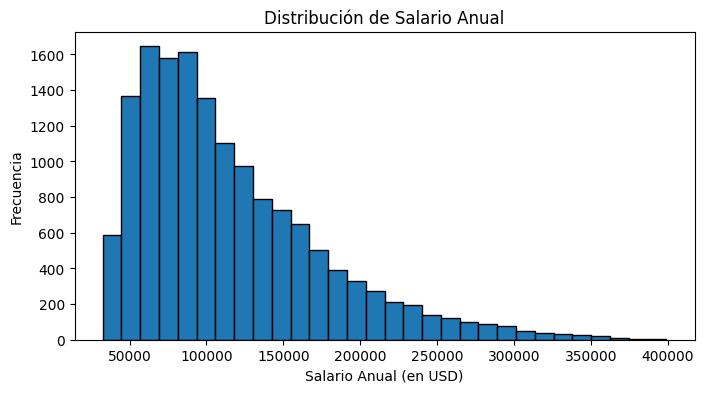

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df['salary_usd'], bins=30, edgecolor='black')
ax.set_title('Distribución de Salario Anual')
ax.set_xlabel('Salario Anual (en USD)')
ax.set_ylabel('Frecuencia')

Como podemos ver, el salario anual tiene una distribución hacia valores más bajos (mediana de 99.705 dólares, y un promedio de 115.349 dólares). Abajo veremos la cantidad de outliers presentes, para posteriormente ver qué podemos hacer con ellos para mejorar el modelo.

In [ ]:
subset = df['salary_usd']
Q1 = subset.quantile(0.25)
Q3 = subset.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
total_outliers_count = len(outliers)

print("Número total de outliers en salary_usd:")
print(f"  Total: {total_outliers_count}")
print(f" Porcentaje de outliers sobre el total de registros: {(( len(outliers) / 15000)*100):2f}")

Número total de outliers en salary_usd:
  Total: 483
 Porcentaje de outliers sobre el total de registros: 3.220000


Como podemos observar, la presencia de outliers representa un 3,22 % de los registros totales.

Esto podría afectar el rendimiento del modelo para predecir valores muy altos.

Comenzando con niveles de experiencia, veremos un gráfico boxplot para observar cómo varía según cada categoría:

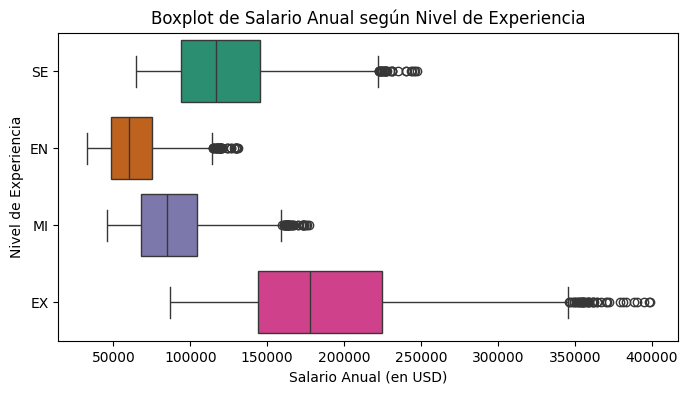

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='salary_usd', y='experience_level', hue='experience_level', palette='Dark2', legend=False)
plt.title('Boxplot de Salario Anual según Nivel de Experiencia')
plt.xlabel('Salario Anual (en USD)')
plt.ylabel('Nivel de Experiencia')
plt.show()

Acá podemos notar que, a medida que avanza el nivel de experiencia requerido para el puesto (Entry->Mid->Senior->Executive), los salarios crecen.

Abajo continuamos con respecto a Tipo de Empleo (Part Time, Full Time, Contrato o Freelance):


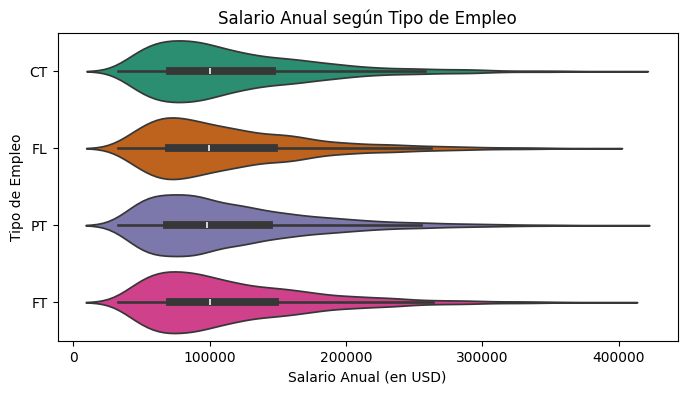

In [ ]:
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x='salary_usd', y='employment_type', hue='employment_type', inner='box', palette='Dark2')
plt.title('Salario Anual según Tipo de Empleo')
plt.xlabel('Salario Anual (en USD)')
plt.ylabel('Tipo de Empleo')
plt.show()

En este caso, vemos que apenas varían los salarios según estos parámetros.

Ahora analizaremos la distribución del salario por países (donde cada empresa se ubica geográficamente), teniendo presente que uno de nuestros analistas sugirió que *las ofertas laborales de países europeos superan en salario a países del continente asiático*. Probaremos esta hipótesis:

/tmp/ipython-input-982366594.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Salario_por_país_mediana = df.groupby('company_location')['salary_usd'].median().sort_values(ascending=False)


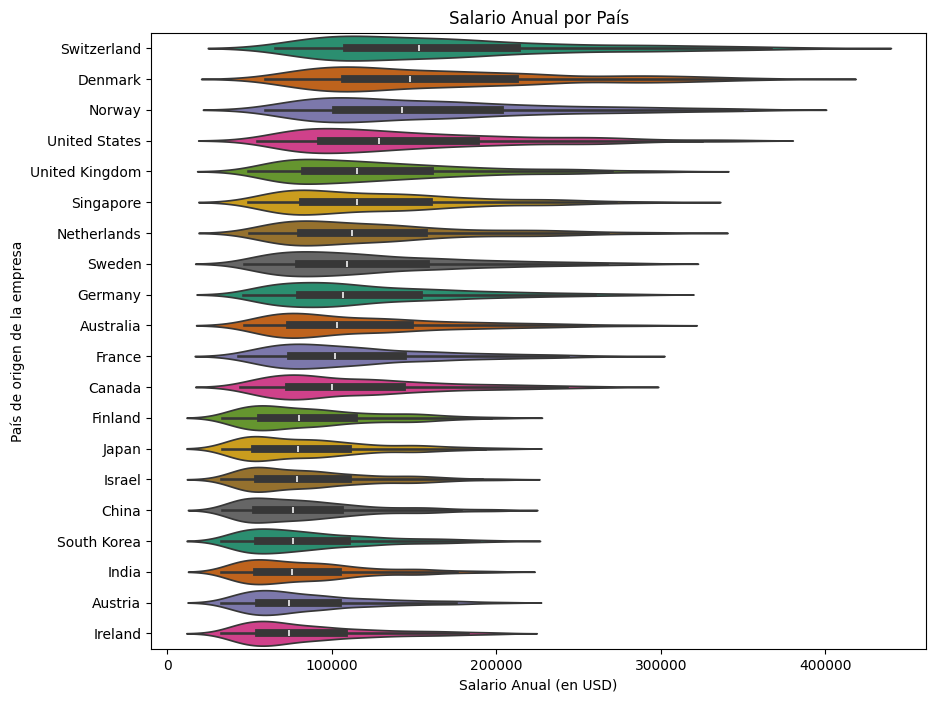

In [ ]:
# Primeramente, para tener los países ordenados de mayor a menor, tomaremos la mediana como referencia
Salario_por_país_mediana = df.groupby('company_location')['salary_usd'].median().sort_values(ascending=False)

df['company_location'] = pd.Categorical(df['company_location'], categories=Salario_por_país_mediana.index, ordered=True)

# Finalmente creamos el gráfico de violín con los datos en orden descendente
plt.figure(figsize=(10, 8))
sns.violinplot(data=df, x='salary_usd', y='company_location', inner='box', palette='Dark2', hue='company_location', legend=False)
plt.title('Salario Anual por País')
plt.xlabel('Salario Anual (en USD)')
plt.ylabel('País de origen de la empresa')
plt.show()

Aquí, las conclusiones son un poco más complejas. Hay países europeos a lo largo de toda la lista, aunque destacan Suiza, Dinamarca y Noruega como los de mejores salarios (y Estados Unidos en el top 4). Con respecto a países asiáticos, India, Corea del Sur, China y Japón están por debajo del top 10 (salvo por Singapur en sexto lugar).

Redefiniendo la afirmación hipotética, podríamos acordar en que ciertos países occidentales pagan en promedio salarios mayores con respecto a países orientales, con la excepción de algunos países europeos como Irlanda, Austria y Finlandia.

Sin embargo, prefiero descartar esta hipótesis (y esta variable para el modelo) ya que depende no tanto del continente, sino de características particulares de cada país.



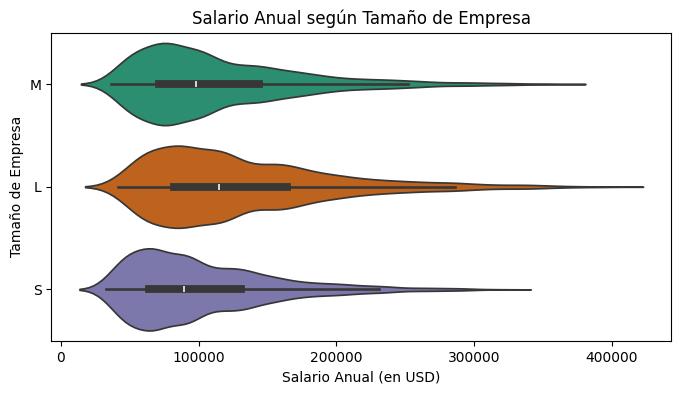

In [ ]:
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x='salary_usd', y='company_size', hue='company_size', inner='box', palette='Dark2')
plt.title('Salario Anual según Tamaño de Empresa')
plt.xlabel('Salario Anual (en USD)')
plt.ylabel('Tamaño de Empresa')
plt.show()

Aquí arriba, vemos que los sueldos mejoran progresivamente a medida que el tamaño de la empresa aumenta, por lo cual es un factor a tener en cuenta para el modelo a utilizar.

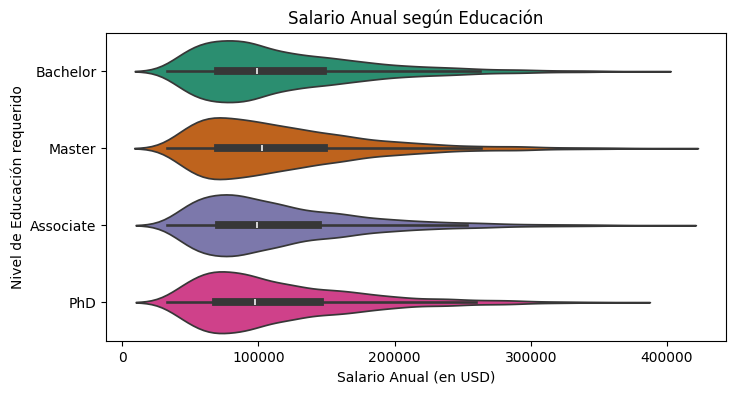

In [ ]:
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x='salary_usd', y='education_required', hue='education_required', inner='box', palette='Dark2')
plt.title('Salario Anual según Educación')
plt.xlabel('Salario Anual (en USD)')
plt.ylabel('Nivel de Educación requerido')
plt.show()

Como vemos, en este caso el nivel de educación no parece ser un factor determinante para el salario, al estar distribuido más o menos equitativamente entre los distintos niveles.

/tmp/ipython-input-390284633.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Salario_por_industria_mediana = df.groupby('industry')['salary_usd'].median().sort_values(ascending=False)


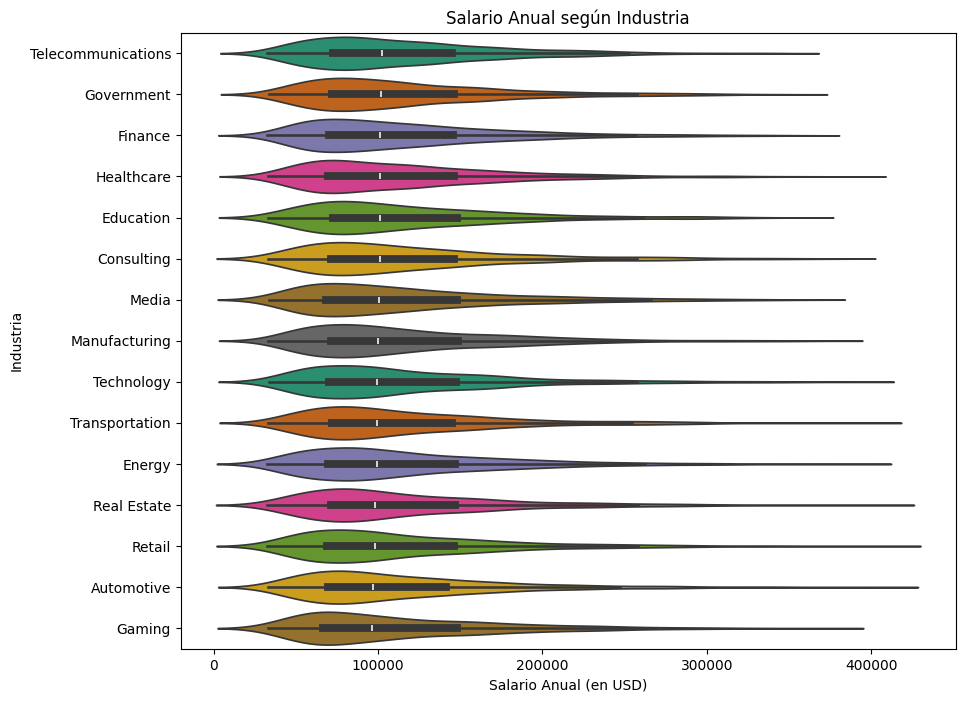

In [ ]:
#Al igual que con company_location, ordenaremos los salarios según la mediana, distinguiendo por tipo de industria.

Salario_por_industria_mediana = df.groupby('industry')['salary_usd'].median().sort_values(ascending=False)

df['industry'] = pd.Categorical(df['industry'], categories=Salario_por_industria_mediana.index, ordered=True)

#Ahora, con los valores ordenados, generamos un violinplot

plt.figure(figsize=(10, 8))
sns.violinplot(data=df, x='salary_usd', y='industry', hue='industry', inner='box', palette='Dark2')
plt.title('Salario Anual según Industria')
plt.xlabel('Salario Anual (en USD)')
plt.ylabel('Industria')
plt.show()

Casi que como sucede con los países de origen, en el caso de las diferentes industrias, podriamos decir que conservan una distribución de salarios similar, por lo que también descartamos esta variable para el modelado.

A modo de resumen, con el EDA pudimos descubrir que las variables más importantes que influyen en el salario son: nivel de experiencia, y en menor medida tamaño de empresa.